                                        MID TERM ASSIGNMENT

BIBLIOGRAPHY:

 1. M. Visinescu, B.A. Bashour, O. Wazni, B. Gopakurmaran, "Automatic Detection of Conducted Premature Atrial Contractions to       Predict Atrial Fibrillation in Patients after Cardiac Surgery", IEEE 2004
 2. Author: Michael Rosengarten BEng, MD.McGill 
 3. H. Bremermann, Distributions Complex Variables and Fourier Transforms, Mass., Reading:Addison-Wesley, 1965.
 4. L. Schwartz, Mathematics for the Physical Sciences, Paris:Hermann, 1966.
 5. L. Glass, Theory of heart, New York:Springer-Verlag, 1991.
 6. M B. Simson, "Use of signals in the terminal QRS complex to identify patients with ventricular tachycardia after myocardial     infarction", Circulation, vol. 64, pp. 235-242, 1982.
 7. Anupama Bhan, "Parametric Models for segmentation of cardiac MRI with geometrical interpretation", IEEE conference on Signal     Processing and Intergrated Networks, vol. 1, pp. 711-716, 2014.
 8. Wartzek, B. Eilebrecht, J. Lem et al., "ECG on the road: Robust and unobtrusive estimation of heart rate", IEEE Trans. on       Biomedical Engineering., vol. 58, no. 11, pp. 3112-3120, 2011.
 9. Sols Bustos Sergio et al., "A 60 dB dynamic range CMOS sixth order 2.4 Hz low pass filter for medical applications",             Circuits and Systems II: Analog and Digital Signal Processing IEEE Transactions on, vol. 47, no. 12, pp. 1391-1398, 2000.
10. S. S. Mehta, S. C. Saxena and H. K. Verma, “Computer aided interpretation of ECG for diagnostics”, International Journal of     Systems Science, 1996, 27, pp. 43-58. 

  

                                         ELECTROCARDIOGRAM (ECG)

ECG:

Electrocardiogram is a diagnostic tool that graphically measures the electrical activity of the heart with respect to time **[1]**  If two surface electrodes are attached to the upper body (thorax) an electrical signal is produced, which is called as an electrocardiogram signal. ECG waves are very important to determine any heart problems. The ECG is a composite of 5 waves (P, Q, R, S, and T). The fault in heart can be identified with the shape of the wave.**[5]** the description of the waves are
                      
  P waves -> the voltage deflection by the depolisation of the atria prior to atrial contraction
  QRS complex-> largest amplitude portion of ECG by current generated when the ventricles depolarise prior to their contraction
  T Wave-> ventricular repolarisation **[6]**
There are two intervals in the wave such as PQ interval and QT interval
The PR interval is measured from the beginning of the P wave to the beginning of the QRS complex. This interval reflects the time the electrical impulse takes to travel from the sinus node through the AV node.
The QT interval is measured from the beginning of the QRS complex to the end of the T wave. Acceptable ranges vary with heart rate, so it must be corrected to the QTc by dividing by the square root of the RR interval.**[2]**

ECG SIGNAL:

An ECG signal is formed due to the ionic current flow causing the cardiac fibers to contract and relax, generating a time variant signal. The input of the ECG is obtained by the potential difference of the electrode placed on the skin Surface.  Bipolar leads and unipolar leads are used.
The signal obtained from the electrodes are typically in the millivolt peak to peak range. Differential amplifiers are used to amplify the signal to acquire a large peak to peak voltage. The ECG signal contains noise components, the most common noise component is the 60Hz power line signal. Notch filters can be used to eliminate this disturbance**[4]**. The filter is designed in a way such that it eliminate baseline wander and powerline interference.

ECG waves are very important to determine any heart problems. It must be free of noise and other disturbances, filters play a major role by eliminating all the disturbances and produce a clear signal. More algorithms are also used to determine the peak values, Example: FFT **[3]** is used to detect the R-Peak. Signal processing is mainly used to give a cleaner signal and better interpretable.



 The length of the time array is: 43081


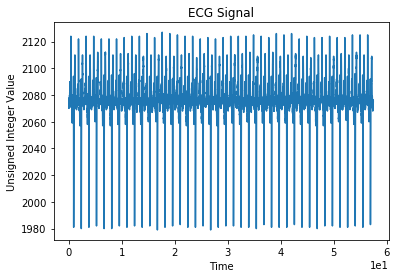

In [13]:
# Question 4: <opening and plotting aami3a.dat file>


%matplotlib inline
import scipy as Sci
import scipy.linalg
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt


ECG_Signal = open('aami3a.dat','rb')
AllSignal = np.fromfile(ECG_Signal,count=-1,dtype=np.uint16)

x=np.arange(0,43081/750,1/750)  
print('\n The length of the time array is: ' + str(len(x)) )
plt.plot(x,AllSignal[:43081])
plt.title('ECG Signal')
plt.xlabel('Time')
plt.ylabel('Unsigned Integer Value')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ECG_Signal.close() 

Question 5: < obtaining samples holding 5 beats > **[7]**


Assume 90 beats per minute > 90/60 = 1.5 beats/second

5 * 1.5= 7.5 seconds.

Ts = 1/750 = 1.333ms       (0.001333) 

7.5/1.33ms = 5639 samples


 The length of the time array is: 5639


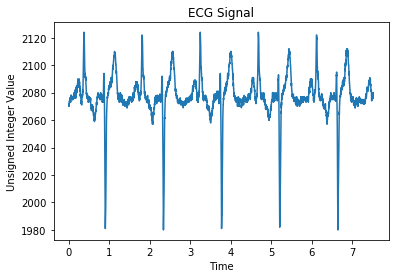

In [14]:
x=np.arange(0,5639/750,1/750) 
print('\n The length of the time array is: ' + str(len(x)) )
plt.plot(x,AllSignal[:5639])
plt.title('ECG Signal')
plt.xlabel('Time')
plt.ylabel('Unsigned Integer Value')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ECG_Signal.close() 

Question 6:  < zoom-in for 5 cardiac cycles >

Considering a person has 60 beats per minute > 60/60 = 1 beats/second

5 * 1= 5 seconds.

Ts = 1/750 = 1.333ms       (0.001333) 

5/1.33ms = 3759 samples

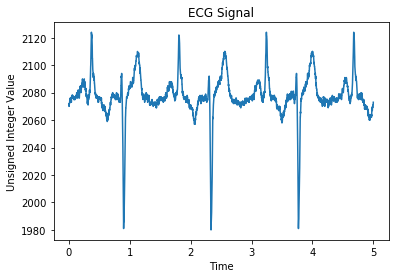

In [15]:
x=np.arange(0,43081/750,1/750) 

inx=np.where(x>5)
inx=inx[0]
plt.plot(x[:inx[0]], AllSignal[:inx[0]])

plt.title('ECG Signal')
plt.xlabel('Time')
plt.ylabel('Unsigned Integer Value')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ECG_Signal.close() 

7th & 8th question  < finding and estimating the heart rate of the individual >
   
      By observing the previous signal, it shows that the person is having lower heart rate 
      assume-> this person is having 4 beats for 5 seconds, 
      for 60 seconds:
                 (60*4)/5= 48 beats for an minute  
                which clearly shows that he is having a lower heart rate
      

DFT


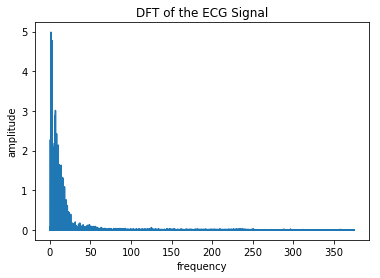

In [16]:
#Question 9: < to obtain DFT of signal and plotting the full spectrum> *[9]*

maxpeak = 0
FirstLine = AllSignal[0:43081]
fileECG_Signal=FirstLine-np.mean(FirstLine)
L=len(fileECG_Signal)
f=np.arange(0,750/2,750/43081)
Y=np.fft.fft(fileECG_Signal)
PyyClean=abs(Y)/L
plt.plot(f, PyyClean[:21541])
plt.xlabel('frequency')
plt.title('DFT of the ECG Signal')
plt.ylabel('amplitude')
#plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
maxpeak = np.max(PyyClean)

print('DFT')



In [17]:
#Question 10: < to find the frequency with highest peak value >

#print(maxpeak)
threshold = 4.97

for x in range(0,21541):
    if PyyClean[x] > threshold:
        freq = str(80*750/43081)
        print('The frequency with the highest peak value is: '+freq+'Hz with a peak value of 4.98')
        



The frequency with the highest peak value is: 1.3927253313525685Hz with a peak value of 4.98


11. Calculation for the heart rate in beats/minute
     
          heart rate-> 60/1.4 = 42.86 Beats
                
               
12. From the peak value in amplitude we can obtain the maximum value of frequency
    they provide the information for the peak value of P, Q, R, S, T waves
    We can find the heart rate with the peak value in fequency, using frequency value we can calculate the time. (time*60) or       (60/max.fequency) will give the normal heart rate


13. if we filter this signal, there wont be much difference in the filtered signal, because it is a clean signal.by using           butterworth filter we can easily find all the intervals and amplitude of ECG waveforms. The Butterworth filter used,           effectively remove noise from the corrupted ECG signal. After finding out all the features and comparing it with the           standard values we can decide that the person is normal or abnormal.  **ref [10]**

Butterworth filter


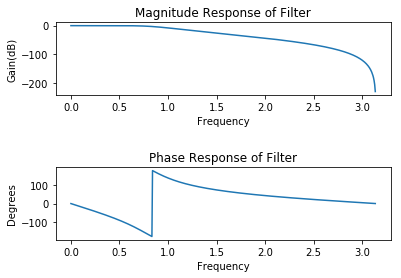

In [18]:
#Question 14: <filtering the signal using a digital low pass butterworth filter>

from scipy import signal
from __future__ import division


max_freq = 750*0.5
cutoff = 100/max_freq


b, a = signal.butter(4,cutoff, btype='lowpass',analog=False)
w, h = signal.freqz(b,a)

plt.subplots_adjust(wspace = 1, hspace = 1)


plt.subplot(211)
plt.plot(w,20*np.log10(abs(h)))
plt.title('Magnitude Response of Filter')
plt.xlabel('Frequency')
plt.ylabel('Gain(dB)')

plt.subplot(212)
plt.plot(w,np.angle(h)/np.pi*180)
plt.title('Phase Response of Filter')
plt.xlabel('Frequency')
plt.ylabel('Degrees')




print('Butterworth filter')

Filtered Signal


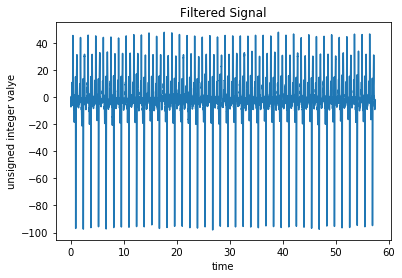

In [19]:
#Question 15: <frequency response of filter>

xsig = AllSignal[0:43081]-np.mean(AllSignal[0:43081])
ysig = signal.lfilter(b,a,xsig)
x = np.arange(0,43081/750.,1/750.)
plt.plot(x,ysig)
plt.title('Filtered Signal')
plt.xlabel('time')
plt.ylabel('unsigned integer valye')
print('Filtered Signal')


the DFT of the signal


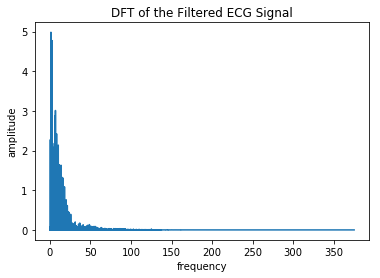

In [20]:
#Question 16: < DFT of the filtered signal>

FirstLine = ysig[0:43081]
fileECG_Signal=FirstLine-np.mean(FirstLine)
L=len(fileECG_Signal)
f=np.arange(0,750/2,750/43081)
Y=np.fft.fft(fileECG_Signal)
PyyClean=abs(Y)/L
plt.plot(f, PyyClean[:21541])
plt.xlabel('frequency')
plt.title('DFT of the Filtered ECG Signal')
plt.ylabel('amplitude')
print('the DFT of the signal')




Question 17:
  
        By comparing both the the DFT signal of the filtered and normal ECG signal, there is no much difference in this wave.         but, it may have very minute changes due to the presence of noise in the signal. even a cleabn signal contains noise.
        the filter does not have any major interpretation on the given signal. so, there is not much impact of filter on our          given signal.